<a href="https://colab.research.google.com/github/ANSHUMITRA22/Chatbot/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# necessary imports
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('Customer-Churn-Records.csv')

In [3]:
# Let's explore the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
# Display the column names
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

Preprocessing Dataset

In [5]:
# Removing unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [7]:
 # Extracting unique values from geography
 geo = df['Geography'].unique()
 print(geo)

['France' 'Spain' 'Germany']


In [8]:
# Extracting unique values from Card Type
types = df['Card Type'].unique()
print(types)

['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [9]:
# Converting Categorical variable into numerical value
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})
df['Geography'] = df['Geography'].map({'France':0, 'Spain':1, 'Germany':2})
df['Card Type'] = df['Card Type'].map({'DIAMOND':0, 'GOLD':1, 'SILVER':2, 'PLATINUM':3})

In [10]:
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.749500,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,1.497900,606.515100
std,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,1.118267,225.924839
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,0.000000,119.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,0.000000,410.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,1.000000,605.000000
75%,718.000000,2.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,2.000000,801.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,3.000000,1000.000000


In [11]:
df.dtypes

CreditScore             int64
Geography               int64
Gender                  int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type               int64
Point Earned            int64
dtype: object

Extracting New Column

In [12]:
df['Senior_Citizen'] = (df['Age'] >= 60).astype(int)

Tenure Group Categorization

In [13]:
new_range = 3  # Customers with tenure less than or equal to 3 years
intermediate_range = 7  # Customers with tenure between 4 and 7 years
long_term_range = 8  # Customers with tenure greater than 7 years

# Create a new 'TenureGroup' column based on tenure ranges
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0, new_range, intermediate_range, df['Tenure'].max()+1],
                           labels=['New', 'Intermediate', 'Long-term'], right=False)

In [14]:
df['TenureGroup'] = df['TenureGroup'].map({'New':0, 'Intermediate':1, 'Long-term':2})

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Senior_Citizen,TenureGroup
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464,0,0
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456,0,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377,0,2
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,0,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,0,0


Visualizing Data

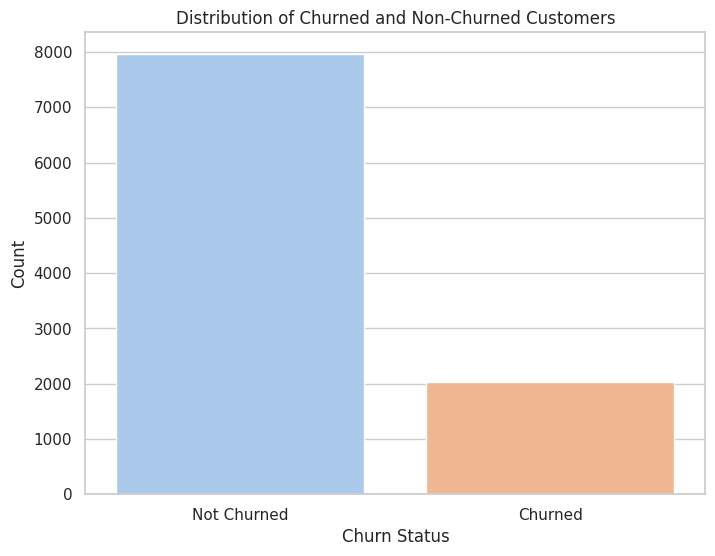

In [16]:
# Get the counts of churned and non-churned customers
churn_counts = df['Exited'].value_counts()

# Set style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="pastel")

# Set labels and title
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.title('Distribution of Churned and Non-Churned Customers')

# Display the plot
plt.show()

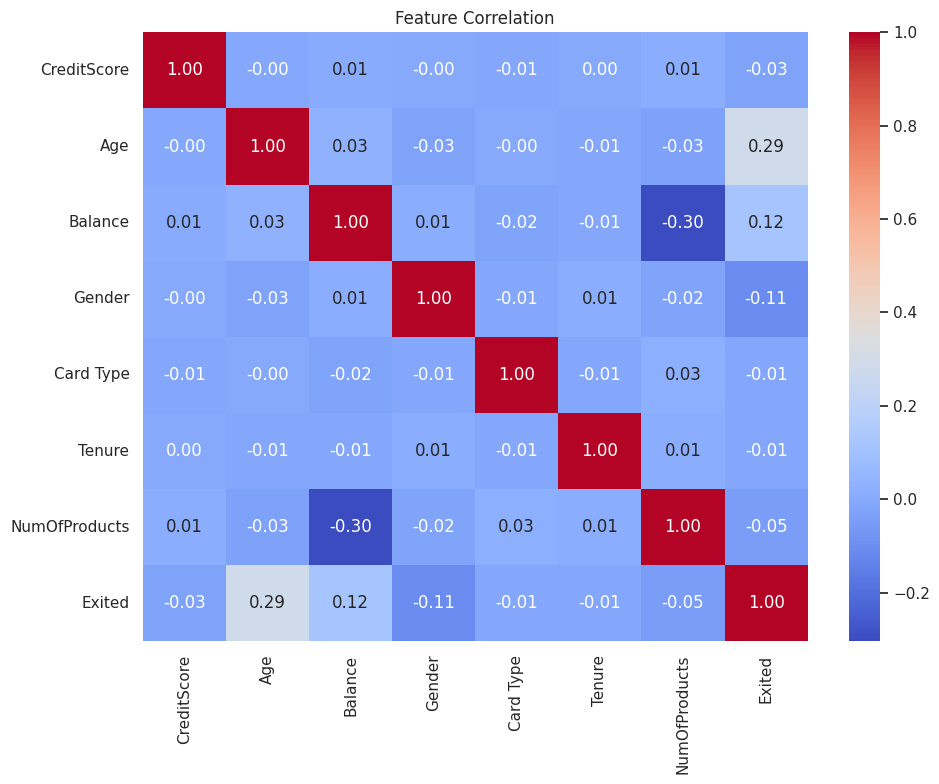

In [17]:
# Compute the correlation matrix
corr_matrix = df[['CreditScore', 'Age', 'Balance','Gender','Card Type', 'Tenure', 'NumOfProducts', 'Exited']].corr()

# Set up the plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and adjust layout
plt.title('Feature Correlation')
plt.tight_layout()

# Display the plot
plt.show()

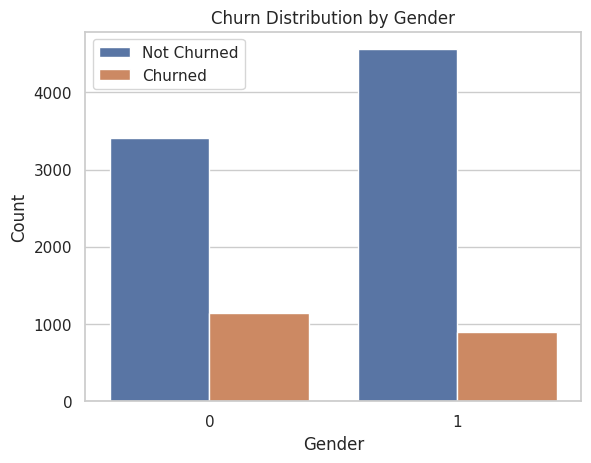

In [18]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Distribution by Gender')
plt.legend(['Not Churned', 'Churned'])
plt.show()

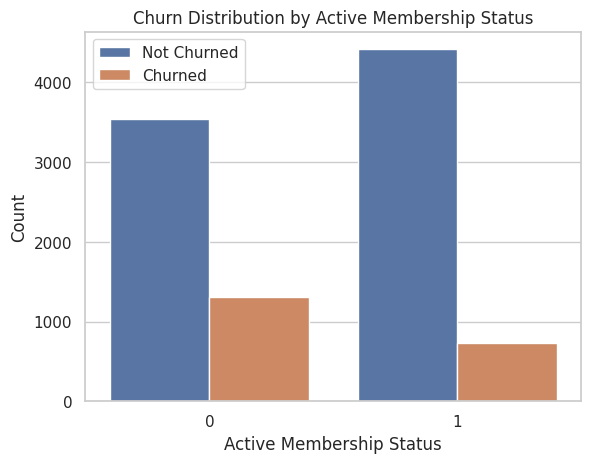

In [19]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.xlabel('Active Membership Status')
plt.ylabel('Count')
plt.title('Churn Distribution by Active Membership Status')
plt.legend(['Not Churned', 'Churned'])
plt.show()

Train Test Split

In [20]:
# Separate features (X) and target variable (y)
X = df.drop(columns='Exited', axis=1)
y = df['Exited']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [21]:
# Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.799


In [33]:
# Calculate additional evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the additional evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.43478260869565216
Recall: 0.07633587786259542
F1 Score: 0.12987012987012989


In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[1568   39]
 [ 363   30]]


<Axes: >

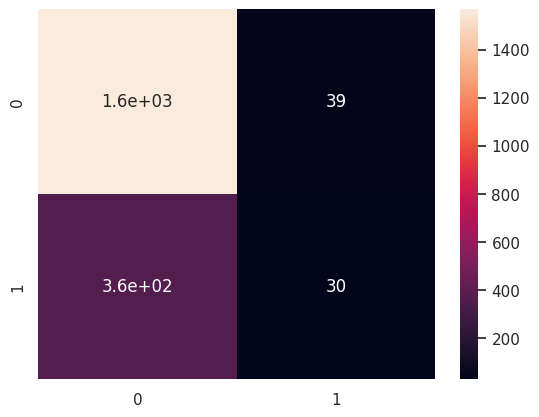

In [ ]:
sns.heatmap(cm,annot=True)

Random Forest

In [25]:
# Random Forest
rf = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

In [26]:
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5)

In [27]:
# Training
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [28]:
# Testing
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rf * 100))

Random Forest Accuracy: 99.90%


In [31]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[1606    1]
 [   1  392]]


<Axes: >

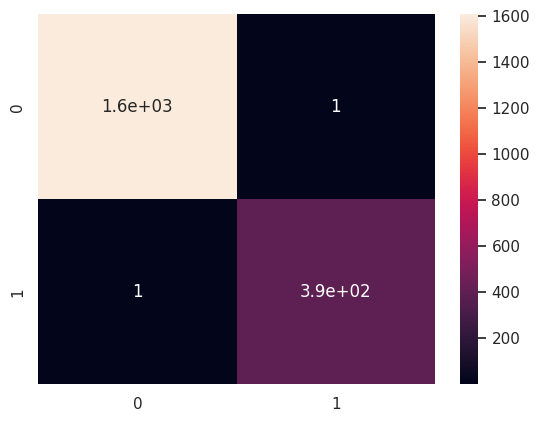

In [32]:
sns.heatmap(cm,annot=True)